In [1]:
import numpy as np
import scipy
from scipy.optimize import fsolve
import matplotlib 
from matplotlib import pyplot

### Problem data

In [2]:
a = 4.5
zf = 0.5  # feed
xd = 0.99  # distillate
xb = 0.01 # bottom
q = 1.2 # thermal ratio
R = 5 # reflux ratio, R = Lr/D 
F = 100 # kmol/hr

### Function problem

In [3]:
def dbf(f):
    # solve for D and B
    return [xd*f[0] + xb*f[1] - zf*F, f[0]+f[1]-F]
[D,B]=fsolve(dbf,[30,20])

Lr = R*D
Ls = Lr + q*F
Vr = Lr + D
Vs = Vr + (q-1)*F

def x_eq(x):
    # x on the equlibrium curve
    return x/(a*(1-x) + x)

def rec_opline(x):
    # rectifying section operating line: y = (Lr/Vr)*x + (D*xd/Vr)
    return (Lr/Vr)*x + (D*xd/Vr)

def strip_opline(x):
    # stripping section operating line: y = (Ls/Vs)*x - (B*xb/Vs)
    return (Ls/Vs)*x - (B*xb/Vs)


def inter_pt(p):
    # intersection point of rectifying opline and stripping opline
    return [(Lr/Vr)*p[0] + (D*xd/Vr) - p[1], (Ls/Vs)*p[0] - (B*xb/Vs) - p[1]]
[xq,yq]=fsolve(inter_pt, [0.5,0.5])

### Problem plot

Stages: 7


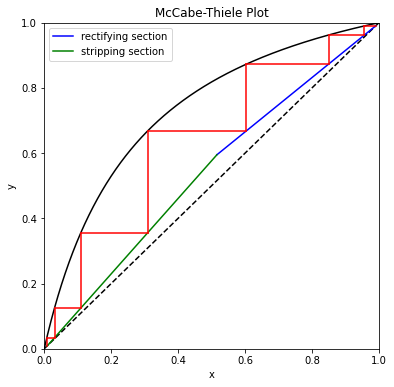

In [4]:
# y-x equilibrium curve
x = np.linspace(0,1,10000)
y = a*x/(1 + x*(a-1))
pyplot.figure(figsize=(6,6))
pyplot.title("McCabe-Thiele Plot")
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x ,y ,color='k')
pyplot.plot(x ,x ,'--' ,color='k')
pyplot.xlim(0 ,1)
pyplot.ylim(0 ,1)
# rectifying section operating line
x, y = [xq ,xd],[yq ,xd]
pyplot.plot(x ,y ,label='rectifying section',color='b')
# stripping section operating line
x, y = [xq,xb],[yq,xb]
pyplot.plot(x,y,label='stripping section',color='g')
pyplot.legend(loc = 'best')

x0, y0 = xd, xd
for i in range(1,1000):
    x1, y1 = x_eq(y0), y0
    pyplot.plot([x0,x1],[y0,y1],color='r')
    if x1 > xq:
        x2, y2 = x1, rec_opline(x1)
    if x1 < xq:
        x2, y2 = x1, strip_opline(x1)
    if (x2, y2) < (xb, xb):
        pyplot.plot([x1,x2] ,[y1,x2] ,color='r')
    else: pyplot.plot([x1,x2] ,[y1,y2] ,color='r')
    x0, y0 = x2, y2
    if y2 < x2:
        break

if i == 999:
    print('Stages: ','inf')
else: print('Stages:',i)